<a href="https://colab.research.google.com/github/arko-14/spam-classifier/blob/main/spamcollection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='latin-1')


In [ ]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df[['message', 'label']]
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

<ipython-input-5-534146bf5fa9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'spam': 1, 'ham': 0})


In [ ]:
df.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
pip install ydata_profiling

In [ ]:
from ydata_profiling import ProfileReport

prof = ProfileReport(df, explorative=True)
prof.to_file(output_file="spam.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from ydata_profiling import ProfileReport
prof = ProfileReport(df, explorative=True)
prof.to_file(output_file="spam-1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df['message'] = df['message'].str.strip().str.lower()

In [ ]:
df = df.drop_duplicates(subset=['label', 'message'])


In [ ]:
df.shape

(5157, 2)

In [ ]:

duplicates = df[df.duplicated(subset=['label', 'message'], keep=False)]
print(duplicates)


Empty DataFrame
Columns: [message, label]
Index: []


In [ ]:

for col in ['label', 'message']:
    print(df[col].apply(repr))


0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5157, dtype: object
0       'go until jurong point, crazy.. available only...
1                         'ok lar... joking wif u oni...'
2       "free entry in 2 a wkly comp to win fa cup fin...
3       'u dun say so early hor... u c already then sa...
4       "nah i don't think he goes to usf, he lives ar...
                              ...                        
5567    'this is the 2nd time we have tried 2 contact ...
5568              'will ì_ b going to esplanade fr home?'
5569    'pity, * was in mood for that. so...any other ...
5570    "the guy did some bitching but i acted like i'...
5571                         'rofl. its true to its name'
Name: message, Length: 5157, dtype: object


In [ ]:
print(df.duplicated(subset=['message', 'label'], keep=False).sum())


0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(C=0.1)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")




Accuracy: 0.9689922480620154


TRAINING A Random Forest model to test it's accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train_vec, y_train)


y_pred_rf = rf_model.predict(X_test_vec)


print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")


Random Forest Accuracy: 0.9806201550387597


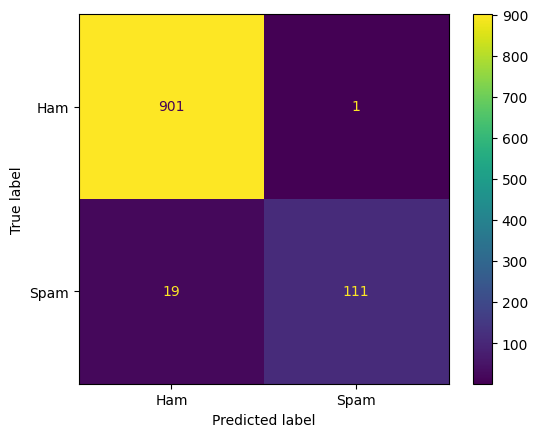

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot()
plt.show()

USING NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb_model = MultinomialNB(class_prior=[0.1, 0.9])
nb_model.fit(X_train_vec, y_train)

MultinomialNB(class_prior=[0.1, 0.9])

In [ ]:
y_pred_nb = nb_model.predict(X_test_vec)
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)}")

Naive Bayes Accuracy: 0.9282945736434108


In [ ]:
from sklearn.model_selection import GridSearchCV


parameters = {'alpha': [0.1, 1.0, 10.0]}


grid_search = GridSearchCV(nb_model, parameters, cv=5)
grid_search.fit(X_train_vec, y_train)


best_model = grid_search.best_estimator_

In [ ]:
y_pred_best = best_model.predict(X_test_vec)
print(f"Accuracy of Best Model: {accuracy_score(y_test, y_pred_best)}")


Accuracy of Best Model: 0.9525193798449613


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


df = pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='latin-1')
df.drop_duplicates(subset='message', inplace=True)


X = df['message']
y = df['label'].map({'ham': 0, 'spam': 1})


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X).toarray()


import pickle
with open('vectorizer(4).pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


model.save('spam_classifier_ann.h5')


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


def predict_message(message):
    message_vectorized = vectorizer.transform([message]).toarray()
    prediction = model.predict(message_vectorized)
    return 'Spam' if prediction >= 0.5 else 'Ham'


example_message = "Congratulations! You've won a free iPhone!"
result = predict_message(example_message)
print(f"Message: {example_message} -> Prediction: {result}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8343 - loss: 0.5376 - val_accuracy: 0.9686 - val_loss: 0.1326
Epoch 2/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9752 - loss: 0.1025 - val_accuracy: 0.9855 - val_loss: 0.0487
Epoch 3/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9949 - loss: 0.0194 - val_accuracy: 0.9855 - val_loss: 0.0436
Epoch 4/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9987 - loss: 0.0079 - val_accuracy: 0.9855 - val_loss: 0.0376
Epoch 5/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9998 - loss: 0.0028 - val_accuracy: 0.9855 - val_loss: 0.0393


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9819 - loss: 0.0492
Test Accuracy: 98.16%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Message: Congratulations! You've won a free iPhone! -> Prediction: Spam


In [ ]:
example_message = "You've won."
result = predict_message(example_message)
print(f"Message: {example_message} -> Prediction: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Message: You've won. -> Prediction: Spam


In [ ]:
example_message = "You are correct"
result = predict_message(example_message)
print(f"Message: {example_message} -> Prediction: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Message: You are correct -> Prediction: Ham
